In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [134]:
# importing data
df = pd.read_csv('data/kc_house_data.csv')

In [135]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   
3          1070         200        270     2010             0   
4           550         550         30     2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 25 columns]

In [136]:
px.scatter(x = df['sqft_living'], y = df['price'], trendline = 'ols')

In [137]:
df.shape

(30155, 25)

In [138]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [139]:
# dropping the duplicated row
df.drop_duplicates()
# dropping the Nulls
df = df.dropna()

In [140]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   
3          1070         200        270     2010             0   
4           550         550         30     2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 25 columns]

In [141]:
# plotting the see the data, and to see the outliers 

fig = px.box(df, y="price")
fig.show()

# we can even go and get rid of max beign 1.3M because no middle class or low class can afford that. 
https://www.fool.com/the-ascent/research/average-house-price-state/

https://www.businessinsider.com/how-expensive-houses-us-median-home-price-mortgage-interest-2022-2

# Business Idea:
## A real estate company asked us to find and predit values for homes for middle class families to buy, because of Covid, it is challenging to find a affordable home.

In [142]:
binary = ['waterfront','greenbelt','nuisance']
df[binary] = (df[binary] == 'YES').astype('int')

In [143]:
df = df.drop(['id', 'date', 'lat', 'long','yr_renovated'], axis = 1)

In [144]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  675000.0         4        1.0         1180      7140     1.0           0   
1  920000.0         5        2.5         2770      6703     1.0           0   
2  311000.0         6        2.0         2880      6156     1.0           0   
3  775000.0         3        3.0         2160      1400     2.0           0   
4  592500.0         2        2.0         1120       758     2.0           0   

   greenbelt  nuisance     view condition      grade  heat_source  \
0          0         0     NONE      Good  7 Average          Gas   
1          0         1  AVERAGE   Average  7 Average          Oil   
2          0         0  AVERAGE   Average  7 Average          Gas   
3          0         0  AVERAGE   Average   9 Better          Gas   
4          0         1     NONE   Average  7 Average  Electricity   

  sewer_system  sqft_above  sqft_basement  sqft_garage  sqft_patio  yr_built  \
0       PUBLIC        1180              0            0          40      1969   
1       PUBLIC        1570           1570            0         240      1950   
2       PUBLIC        1580           1580            0           0      1956   
3       PUBLIC        1090           1070          200         270      2010   
4       PUBLIC        1120            550          550          30      2012   

                                             address  
0  2102 Southeast 21st Court, Renton, Washington ...  
1  11231 Greenwood Avenue North, Seattle, Washing...  
2  8504 South 113th Street, Seattle, Washington 9...  
3  4079 Letitia Avenue South, Seattle, Washington...  
4  2193 Northwest Talus Drive, Issaquah, Washingt...

In [145]:

code = [x.split()[-3] for x in df['address']]
zip_code = [x.translate(str.maketrans('', '', string.punctuation)) for x in code]

In [146]:
df['zip_code'] = zip_code

In [147]:
df['zip_code'].value_counts()

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
48336      1
17702      1
50325      1
49858      1
17111      1
Name: zip_code, Length: 399, dtype: int64

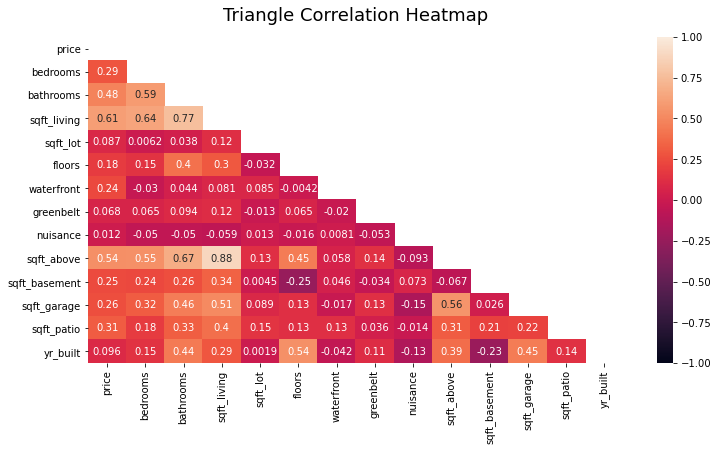

In [148]:
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(abs(df.corr()), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Ordinal Data

In [149]:
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [150]:
df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [151]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [152]:
from sklearn.preprocessing import OrdinalEncoder
# ordering the grade column

cat_subset = df[['grade','condition','view']]

grade_order = ['2 Substandard','3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', 
               '10 Very Good', '11 Excellent', '12 Luxury','13 Mansion']

con_order = ['Poor','Fair','Average', 'Good','Very Good']

view_order = ['NONE','FAIR','AVERAGE','GOOD','EXCELLENT']

# reg_grade_order = ['7 Average', '9 Better', '8 Good', '6 Low Average', '5 Fair',
#        '4 Low', '10 Very Good', '11 Excellent', '3 Poor', '12 Luxury']

o_enc = OrdinalEncoder(categories = [grade_order,con_order,view_order])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['2 Substandard', '3 Poor', '4 Low', '5 Fair',
                            '6 Low Average', '7 Average', '8 Good', '9 Better',
                            '10 Very Good', '11 Excellent', '12 Luxury',
                            '13 Mansion'],
                           ['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])

In [153]:
X_subset_or = pd.DataFrame(o_enc.transform(cat_subset), columns = cat_subset.columns)
X_subset_or

grade  condition  view
0        5.0        3.0   0.0
1        5.0        2.0   2.0
2        5.0        2.0   2.0
3        7.0        2.0   2.0
4        5.0        2.0   0.0
...      ...        ...   ...
30106    6.0        3.0   0.0
30107    5.0        2.0   1.0
30108    5.0        2.0   0.0
30109    6.0        2.0   0.0
30110    5.0        2.0   0.0

[30111 rows x 3 columns]

# Nomial Data

In [154]:
df.select_dtypes(include=['object']).head()

view condition      grade  heat_source sewer_system  \
0     NONE      Good  7 Average          Gas       PUBLIC   
1  AVERAGE   Average  7 Average          Oil       PUBLIC   
2  AVERAGE   Average  7 Average          Gas       PUBLIC   
3  AVERAGE   Average   9 Better          Gas       PUBLIC   
4     NONE   Average  7 Average  Electricity       PUBLIC   

                                             address zip_code  
0  2102 Southeast 21st Court, Renton, Washington ...    98055  
1  11231 Greenwood Avenue North, Seattle, Washing...    98133  
2  8504 South 113th Street, Seattle, Washington 9...    98178  
3  4079 Letitia Avenue South, Seattle, Washington...    98118  
4  2193 Northwest Talus Drive, Issaquah, Washingt...    98027

In [155]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(sparse=False)
# heat source
nominal_data = ['heat_source','sewer_system','zip_code']

# tranforming the nomial subset
X_nom_trans = onehot_enc.fit_transform(df[nominal_data])

X_norm = pd.DataFrame(X_nom_trans, columns = onehot_enc.get_feature_names())

In [156]:
X_norm.head()

x0_Electricity  x0_Electricity/Solar  x0_Gas  x0_Gas/Solar  x0_Oil  \
0             0.0                   0.0     1.0           0.0     0.0   
1             0.0                   0.0     0.0           0.0     1.0   
2             0.0                   0.0     1.0           0.0     0.0   
3             0.0                   0.0     1.0           0.0     0.0   
4             1.0                   0.0     0.0           0.0     0.0   

   x0_Oil/Solar  x0_Other  x1_PRIVATE  x1_PRIVATE RESTRICTED  x1_PUBLIC  ...  \
0           0.0       0.0         0.0                    0.0        1.0  ...   
1           0.0       0.0         0.0                    0.0        1.0  ...   
2           0.0       0.0         0.0                    0.0        1.0  ...   
3           0.0       0.0         0.0                    0.0        1.0  ...   
4           0.0       0.0         0.0                    0.0        1.0  ...   

   x2_98422  x2_98663  x2_99202  x2_99203  x2_99223  x2_99403  x2_99501  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   x2_99504  x2_99701  x2_99705  
0       0.0       0.0       0.0  
1       0.0       0.0       0.0  
2       0.0       0.0       0.0  
3       0.0       0.0       0.0  
4       0.0       0.0       0.0  

[5 rows x 410 columns]

# Numbers

In [157]:
df.select_dtypes(exclude=['object']).head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  675000.0         4        1.0         1180      7140     1.0           0   
1  920000.0         5        2.5         2770      6703     1.0           0   
2  311000.0         6        2.0         2880      6156     1.0           0   
3  775000.0         3        3.0         2160      1400     2.0           0   
4  592500.0         2        2.0         1120       758     2.0           0   

   greenbelt  nuisance  sqft_above  sqft_basement  sqft_garage  sqft_patio  \
0          0         0        1180              0            0          40   
1          0         1        1570           1570            0         240   
2          0         0        1580           1580            0           0   
3          0         0        1090           1070          200         270   
4          0         1        1120            550          550          30   

   yr_built  
0      1969  
1      1950  
2      1956  
3      2010  
4      2012

In [206]:
X_num = df.drop(['price','grade','condition','view','heat_source','sewer_system','zip_code','address','yr_built'], axis=1)
X_num.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  greenbelt  \
0         4        1.0         1180      7140     1.0           0          0   
1         5        2.5         2770      6703     1.0           0          0   
2         6        2.0         2880      6156     1.0           0          0   
3         3        3.0         2160      1400     2.0           0          0   
4         2        2.0         1120       758     2.0           0          0   

   nuisance  sqft_above  sqft_basement  sqft_garage  sqft_patio  
0         0        1180              0            0          40  
1         1        1570           1570            0         240  
2         0        1580           1580            0           0  
3         0        1090           1070          200         270  
4         1        1120            550          550          30

In [207]:
X_subset_or.shape

(30111, 3)

In [208]:
X_norm.shape

(30111, 410)

In [209]:
X_num.shape

(30111, 12)

In [210]:
X_subset_or

grade  condition  view
0        5.0        3.0   0.0
1        5.0        2.0   2.0
2        5.0        2.0   2.0
3        7.0        2.0   2.0
4        5.0        2.0   0.0
...      ...        ...   ...
30106    6.0        3.0   0.0
30107    5.0        2.0   1.0
30108    5.0        2.0   0.0
30109    6.0        2.0   0.0
30110    5.0        2.0   0.0

[30111 rows x 3 columns]

In [211]:
data = pd.concat([df['price'].reset_index(),X_num.reset_index(),X_subset_or,X_norm],axis=1)


In [212]:
data.isna().sum().sum()

0

In [213]:
data = data.drop(['index'], axis = 1)

In [214]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  675000.0         4        1.0         1180      7140     1.0           0   
1  920000.0         5        2.5         2770      6703     1.0           0   
2  311000.0         6        2.0         2880      6156     1.0           0   
3  775000.0         3        3.0         2160      1400     2.0           0   
4  592500.0         2        2.0         1120       758     2.0           0   

   greenbelt  nuisance  sqft_above  ...  x2_98422  x2_98663  x2_99202  \
0          0         0        1180  ...       0.0       0.0       0.0   
1          0         1        1570  ...       0.0       0.0       0.0   
2          0         0        1580  ...       0.0       0.0       0.0   
3          0         0        1090  ...       0.0       0.0       0.0   
4          0         1        1120  ...       0.0       0.0       0.0   

   x2_99203  x2_99223  x2_99403  x2_99501  x2_99504  x2_99701  x2_99705  
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 426 columns]

In [215]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'sqft_above',
       ...
       'x2_98422', 'x2_98663', 'x2_99202', 'x2_99203', 'x2_99223', 'x2_99403',
       'x2_99501', 'x2_99504', 'x2_99701', 'x2_99705'],
      dtype='object', length=426)

In [227]:

# data and slipting 70 training and 30 testing
y = data["price"]
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# standarding 
ss = StandardScaler()
ss.fit(X_train)

# linear regression model
lr = LinearRegression()


X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)


lr = LinearRegression()

# Getting the R score
lr.fit(X_standardized_train, y_train)
print(f'R^2 value: {lr.score(X_standardized_train, y_train)}')



y_pred = lr.predict(X_standardized_test)

print(f'MAE: {mean_absolute_error(y_pred, y_test)}')
rms = mean_squared_error(y_test,y_pred, squared=False)

print(f'Root Mean Squared Error {rms}')

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

R^2 value: 0.6388572096991738
MAE: 1811790652738765.5
Root Mean Squared Error 2.7728569369211396e+16


In [217]:
coefficients

0             0
0       bedrooms -6.073205e+04
1      bathrooms  3.626812e+04
2    sqft_living  1.522023e+05
3       sqft_lot  2.975705e+04
4         floors -7.411131e+04
..           ...           ...
420     x2_99403 -2.273737e-13
421     x2_99501 -6.023099e+15
422     x2_99504 -1.204534e+16
423     x2_99701  0.000000e+00
424     x2_99705 -6.023099e+15

[425 rows x 2 columns]

# poly

In [194]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X) 


names = poly.get_feature_names(input_features=X.columns)
X_poly = pd.DataFrame(X_poly, columns=names, index = X.index)





In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3)


ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)


lr_raw = LinearRegression()
lr_raw.fit(X_standardized_train, y_train)
print(f'R^2 value: {lr_raw.score(X_standardized_train, y_train)}')
y_pred = lr_raw.predict(X_standardized_test)
print(mean_absolute_error(y_pred, y_test))

pd.DataFrame(lr_raw.coef_[0],
          index = X_poly.columns) 

KeyboardInterrupt: 